In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from datetime import datetime
import seaborn as sns
sns.set()
plt.rcParams['font.sans-serif'] = ['SimHei'] # 显示中文标题 
plt.rcParams['axes.unicode_minus'] = False # 正常显示正负号 

In [2]:
f = pd.ExcelFile('D:/戒烟问题数据.xlsx')
df = pd.read_excel(f, sheet_name=[2])
df = df[2]

In [3]:
Ok = df[df['Day_abs']==365].copy()

In [4]:
del Ok['Id'],

In [5]:
del Ok['Day_abs']

In [6]:
Ok.index = df[df['Day_abs']==365]['Id']

Text(0.5,1,'戒烟成功满365天的分析示图')

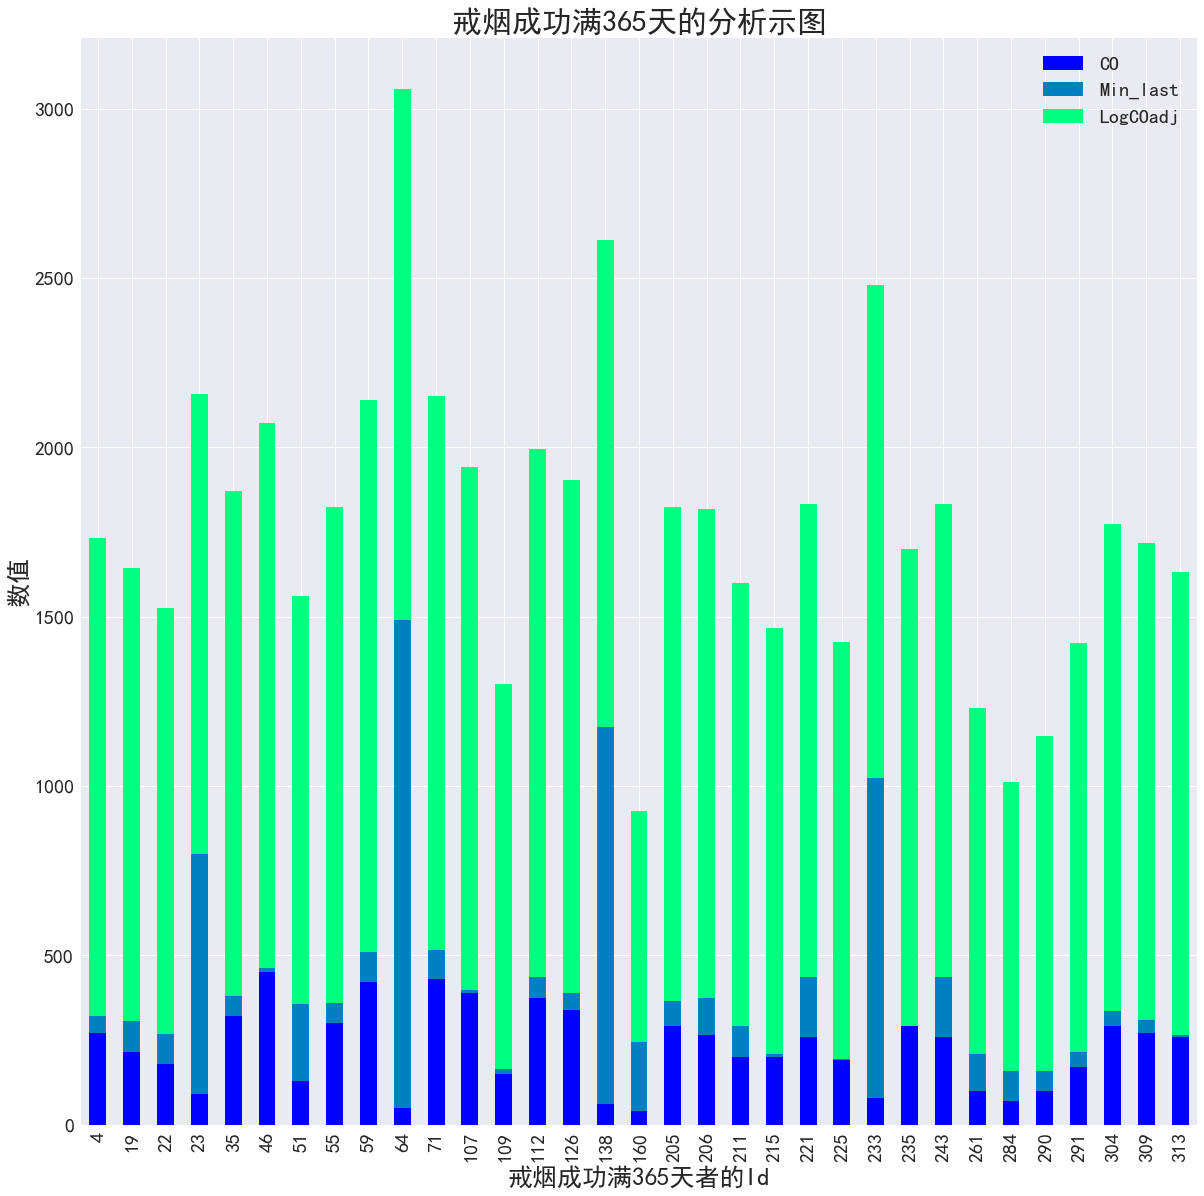

In [7]:
Ok[['CO','Min_last','LogCOadj']].plot(kind='bar',figsize=(20,20),colormap='winter',stacked=True)
plt.xlabel("戒烟成功满365天者的Id",fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("数值",fontsize=25)
plt.legend(loc = 'upper right',
           fontsize=20
          )
plt.title('戒烟成功满365天的分析示图',fontsize=30)

Text(0.5,1,'戒烟成功满365天的分析示图')

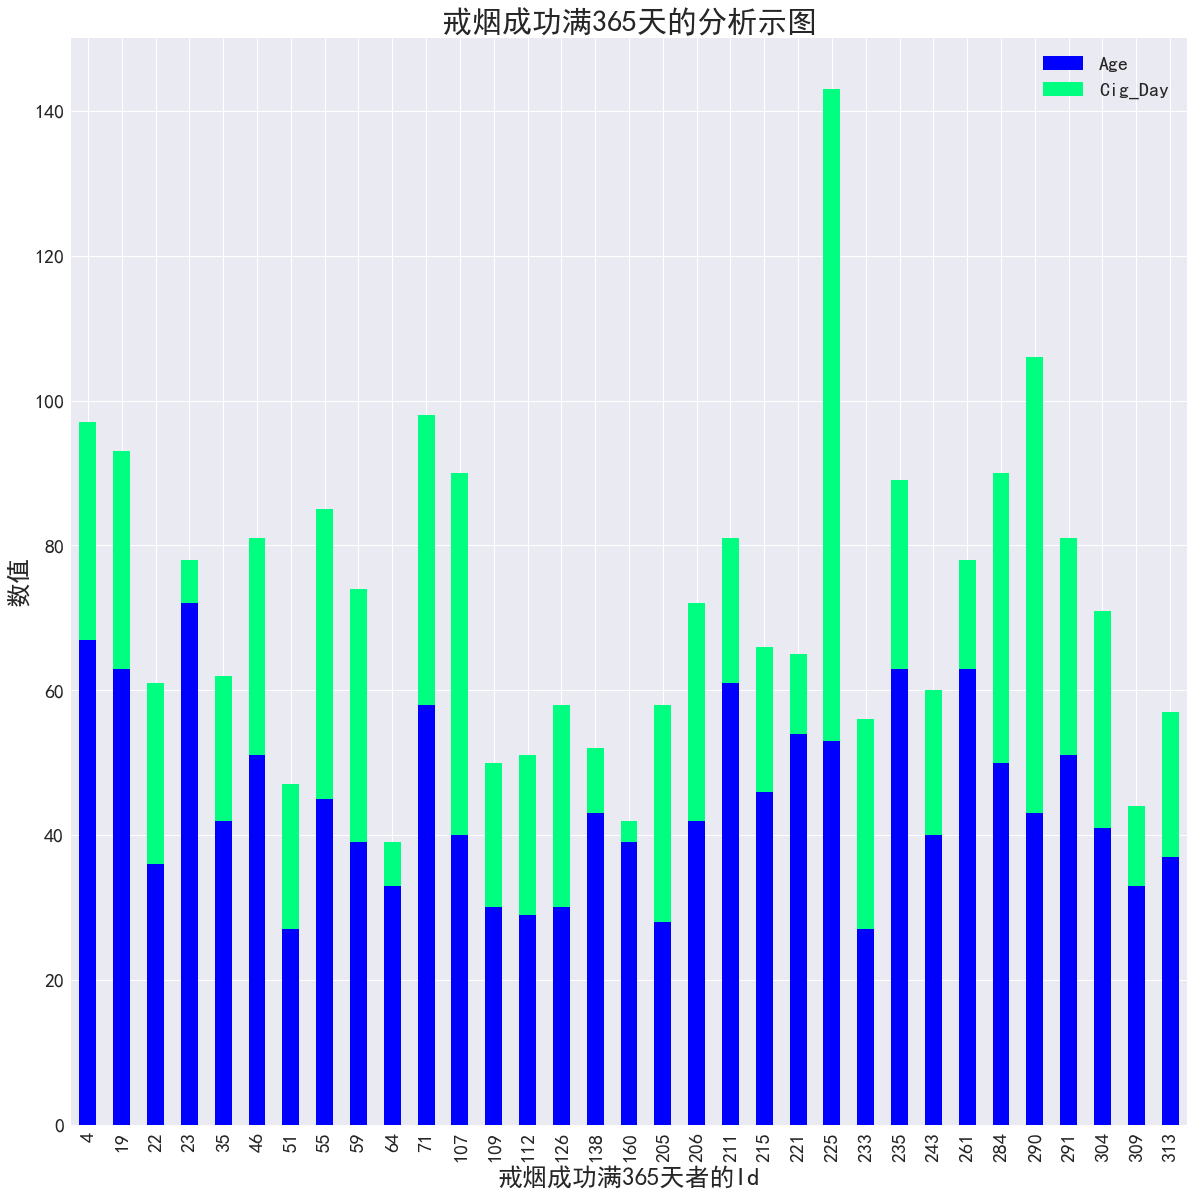

In [8]:
Ok[['Age','Cig_Day']].plot(kind='bar',figsize=(20,20),colormap='winter',stacked=True)
plt.xlabel("戒烟成功满365天者的Id",fontsize=25)
plt.xticks(fontsize=20)
plt.yticks(fontsize=20)
plt.ylabel("数值",fontsize=25)
plt.legend(loc = 'upper right',
           fontsize=20
          )
plt.title('戒烟成功满365天的分析示图',fontsize=30)

In [9]:
Not_ok = df[df['Day_abs']<365].copy()

In [10]:
del Not_ok['Id'], Not_ok['Day_abs']
Not_ok.index = df[df['Day_abs']<365]['Id']

Text(0.5,1,'戒烟成功不满365天的分析示图')

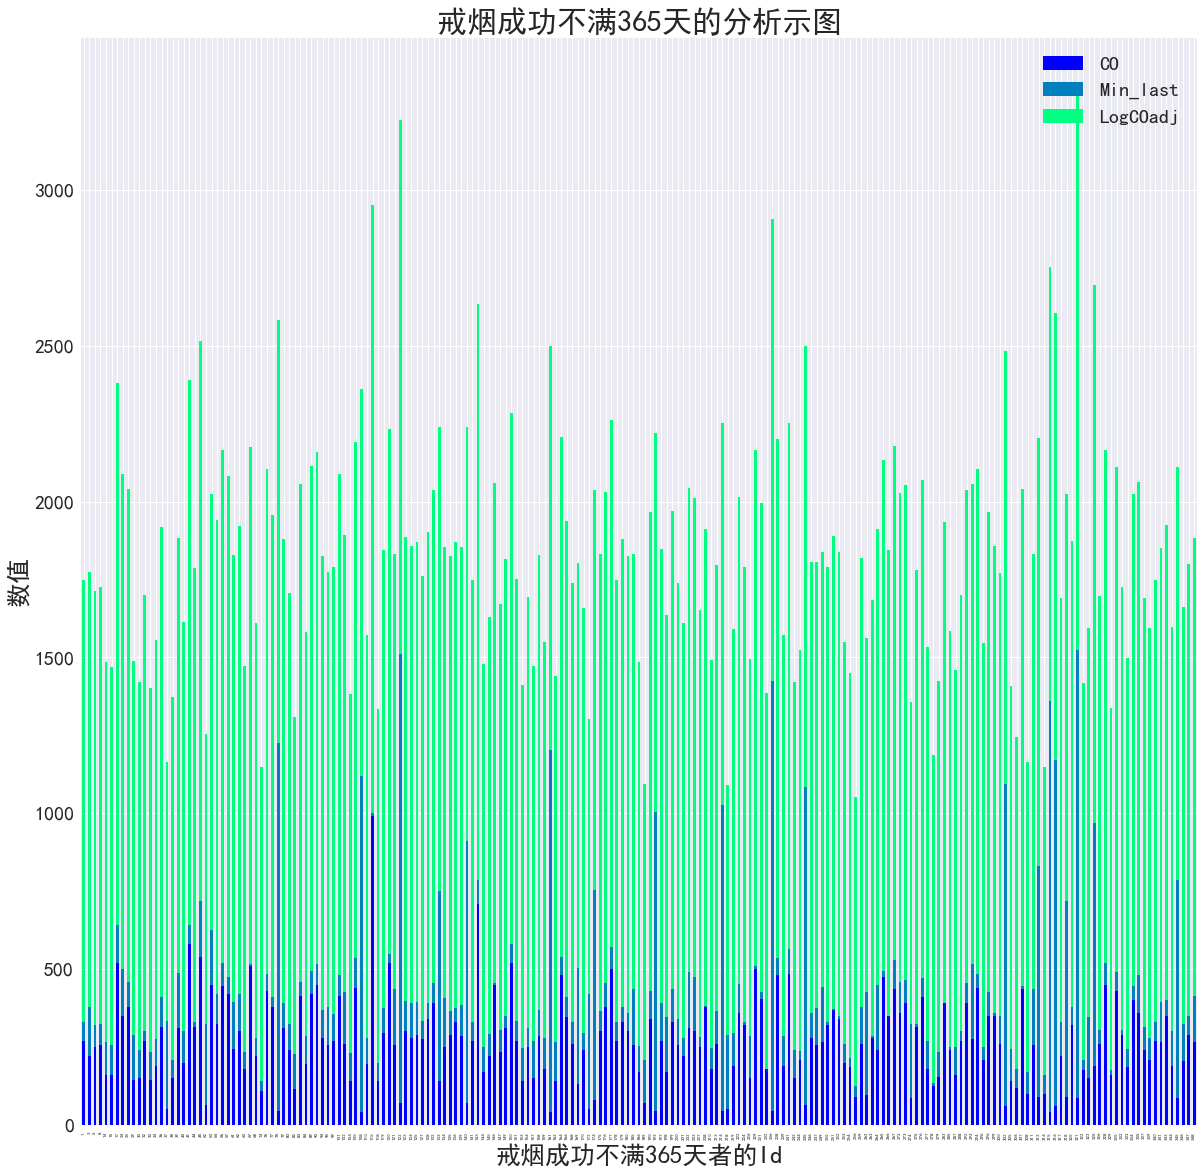

In [11]:
Not_ok[['CO','Min_last','LogCOadj']].plot(kind='bar',figsize=(20,20),colormap='winter',stacked=True)
plt.xlabel("戒烟成功不满365天者的Id",fontsize=25)
plt.xticks(fontsize=5)
plt.yticks(fontsize=20)
plt.ylabel("数值",fontsize=25)
plt.legend(loc = 'upper right',
           fontsize=20
          )
plt.title('戒烟成功不满365天的分析示图',fontsize=30)

Text(0.5,1,'戒烟不成功者的分析示图')

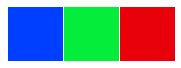

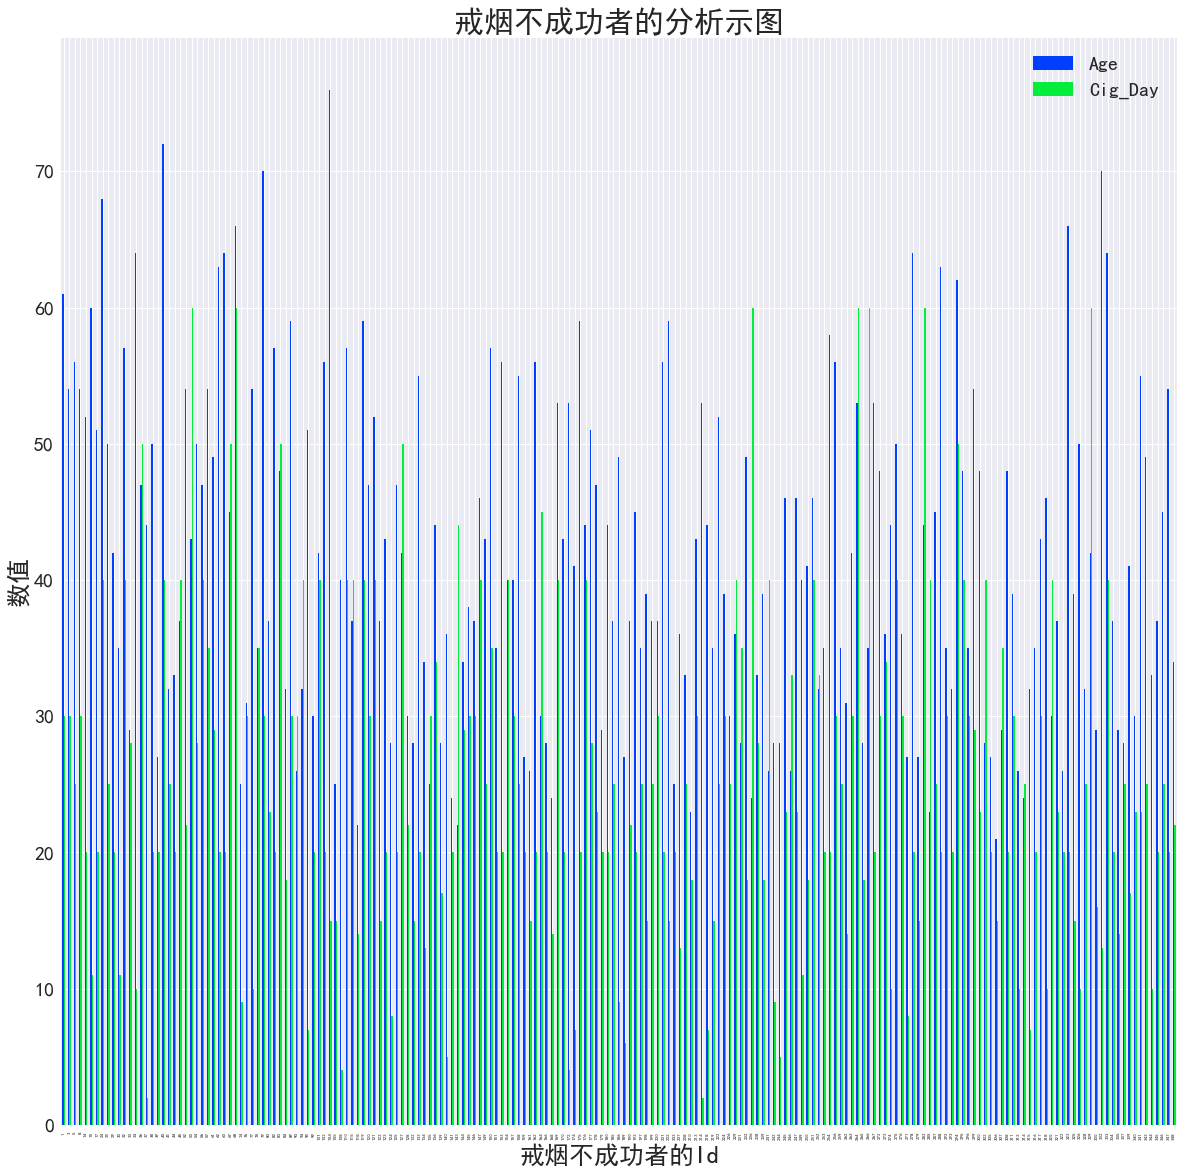

In [12]:
sns.set_palette(sns.color_palette('bright',3))
sns.palplot(sns.color_palette('bright',3))
Not_ok[['Age','Cig_Day']].plot(kind='bar',figsize=(20,20),stacked=False)
plt.xlabel("戒烟不成功者的Id",fontsize=25)
plt.xticks(fontsize=5)
plt.yticks(fontsize=20)
plt.ylabel("数值",fontsize=25)
plt.legend(loc = 'upper right',
           fontsize=20
          )
plt.title('戒烟不成功者的分析示图',fontsize=30)

### 成功与否年龄均值

In [13]:
Not_ok['Age'].mean()

41.840796019900495

In [14]:
Ok['Age'].mean()

44.72727272727273

### 性别比较

In [15]:
Not_ok[Not_ok['Gender']==1]['Gender'].count() / Not_ok['Gender'].count()

0.4626865671641791

In [16]:
Ok[Ok['Gender']==1]['Gender'].count() / Ok['Gender'].count()

0.5151515151515151

In [17]:
Ok['Cig_Day'].mean()

27.242424242424242

In [18]:
Not_ok['Cig_Day'].mean()

25.26865671641791

In [19]:
print(Ok['CO'].mean()) # CO均值
print(Ok['CO'].max() - Ok['CO'].min()) # 最大最小差值

227.3030303030303
410


In [20]:
Not_ok['CO'].mean()

263.5820895522388

In [21]:
Ok['LogCOadj'].mean()

1347.878787878788

In [22]:
Not_ok['LogCOadj'].mean()

1405.597014925373

In [23]:
df_new = df.copy()

In [24]:
df_new[df_new['Day_abs']<365]['Day_abs'] = 0
df_new[df_new['Day_abs']==365]['Day_abs'] = 1

D:\ruanjian\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
D:\ruanjian\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [25]:
df_new.iloc[1,7]

3

In [26]:
for i in range(len(df_new)):
    if df_new.iloc[i,7] == 365:
        df_new.iloc[i,7] = 1
    else:
        df_new.iloc[i,7] = 0

In [27]:
df_new

,Id,Age,Gender,Cig_Day,CO,Min_last,LogCOadj,Day_abs
0,1,61,1,30,270,60,1419,0
1,3,54,1,30,220,160,1393,0
2,4,67,1,30,270,50,1412,1
3,5,56,1,25,250,70,1392,0
4,8,54,1,30,255,70,1400,0
5,14,52,1,20,160,105,1220,0
6,15,60,1,11,160,95,1214,0
7,17,51,1,20,520,120,1742,0
8,19,63,1,30,215,90,1339,1
9,22,36,2,25,180,87,1260,1


In [28]:
X = df_new.loc[:, 'Age':'LogCOadj']

In [29]:
y = df_new.loc[:,'Day_abs']

## 主成分分析 PCA

In [30]:
from sklearn.decomposition import PCA

In [31]:
X.shape

(234, 6)

In [32]:
pca = PCA(n_components=X.shape[1])

In [33]:
pca.fit(X)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [34]:
pca.explained_variance_ratio_ # 每一个主成分的可解释方差是多少

array([6.41566271e-01, 3.44667106e-01, 1.17361243e-02, 1.15163526e-03,
       8.77229912e-04, 1.63337781e-06])

### 前几维能保留多少信息

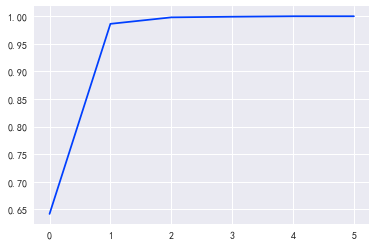

In [35]:
# 前几维能保留多少信息
plt.plot([i for i in range(X.shape[1])],
         [np.sum(pca.explained_variance_ratio_[:i+1]) for i in range(X.shape[1])])

In [36]:
pca = PCA(n_components=2)
pca.fit(X)
X_reduction = pca.transform(X)
# 降噪音，去除一些信息
X_restore = pca.inverse_transform(X_reduction)
X_restore.shape

(234, 6)

In [37]:
X_restore

array([[  42.68703767,    1.51473739,   26.83533021,  290.39679974,
          64.67674629, 1407.48809834],
       [  42.4302716 ,    1.53149264,   25.22776686,  249.11906377,
         166.74001839, 1376.66682164],
       [  42.77581221,    1.51432604,   26.80779964,  289.23101059,
          54.37600082, 1401.10417024],
       ...,
       [  42.96766256,    1.53357412,   24.56558045,  228.94834739,
         125.61098903, 1323.54678431],
       [  42.4770331 ,    1.51039085,   27.47707089,  308.41403111,
          64.34512792, 1439.43378786],
       [  41.97727886,    1.52013366,   26.82700754,  293.67218567,
         156.81670326, 1451.85518126]])

In [38]:
X_reduction

array([[-1.16817985e+02, -3.80627503e+00],
       [-4.36266944e+00, -2.44742829e+01],
       [-1.25548593e+02, -1.22917975e+01],
       [-9.84011488e+01, -3.36404236e+01],
       [-1.00802613e+02, -2.44268705e+01],
       [-1.95337164e+01, -2.14038712e+02],
       [-2.82819240e+01, -2.21803917e+02],
       [-1.68367037e+02,  3.99488608e+02],
       [-6.33518862e+01, -9.01626977e+01],
       [-4.69679368e+01, -1.74638031e+02],
       [ 5.60431400e+02,  1.61122638e+01],
       [-7.37899474e+01,  2.00022234e+02],
       [-1.47711109e+02,  1.88594273e+02],
       [ 2.30029669e+01, -2.27173100e+02],
       [-2.64185668e+01, -2.54977571e+02],
       [-1.43161270e+02, -2.80920197e+01],
       [-2.35569988e+01, -2.69023436e+02],
       [-5.41832024e+01, -1.52058701e+02],
       [-1.39345343e+02,  8.13276168e+01],
       [-1.06817753e+02,  1.01743145e+02],
       [ 2.28022712e+02, -5.58736114e+02],
       [-5.29318795e+01, -2.78538114e+02],
       [-1.43144955e+01,  2.20256830e+01],
       [-4.

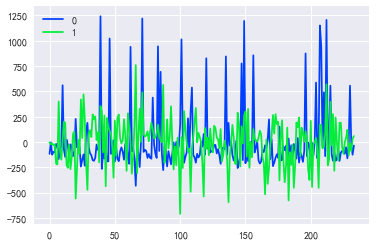

In [39]:
DataFrame(X_reduction).plot()

In [40]:
from sklearn.preprocessing import StandardScaler

standardScaler = StandardScaler()
standardScaler.fit(X_restore)
X_standard = standardScaler.transform(X_restore)
X_standard

array([[ 0.2352551 , -0.33720703,  0.2646241 ,  0.24463144, -0.38017086,
         0.05081382],
       [ 0.09771173,  0.03506252, -0.06557294, -0.07160782, -0.03365821,
        -0.10531944],
       [ 0.28280947, -0.34634661,  0.25896926,  0.23570003, -0.41514269,
         0.01847435],
       ...,
       [ 0.38557905,  0.08130914, -0.20158749, -0.22614082, -0.17329442,
        -0.37441291],
       [ 0.12276074, -0.43377901,  0.39643905,  0.38266605, -0.38129673,
         0.21264308],
       [-0.1449455 , -0.21731231,  0.26291461,  0.26972501, -0.06734863,
         0.2755669 ]])

In [41]:
from sklearn.linear_model import LogisticRegression as LR
from sklearn.linear_model import RandomizedLogisticRegression as RLR

In [42]:
rlr = RLR()
rlr.fit(X_standard,y)

## 算出使用的参数
rlr.get_support()

D:\ruanjian\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedLogisticRegression is deprecated; The class RandomizedLogisticRegression is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


array([False, False, False, False, False, False])

In [43]:
rlr.scores_

array([0., 0., 0., 0., 0., 0.])

In [44]:

rlr = RLR()
rlr.fit(X,y)

## 算出使用的参数
rlr.get_support()

D:\ruanjian\Anaconda3\lib\site-packages\sklearn\utils\deprecation.py:58: DeprecationWarning: Class RandomizedLogisticRegression is deprecated; The class RandomizedLogisticRegression is deprecated in 0.19 and will be removed in 0.21.
  warnings.warn(msg, category=DeprecationWarning)


array([False, False, False, False, False, False])

In [45]:
df

,Id,Age,Gender,Cig_Day,CO,Min_last,LogCOadj,Day_abs
0,1,61,1,30,270,60,1419,6
1,3,54,1,30,220,160,1393,3
2,4,67,1,30,270,50,1412,365
3,5,56,1,25,250,70,1392,16
4,8,54,1,30,255,70,1400,45
5,14,52,1,20,160,105,1220,47
6,15,60,1,11,160,95,1214,36
7,17,51,1,20,520,120,1742,2
8,19,63,1,30,215,90,1339,365
9,22,36,2,25,180,87,1260,365


D:\ruanjian\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\ruanjian\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


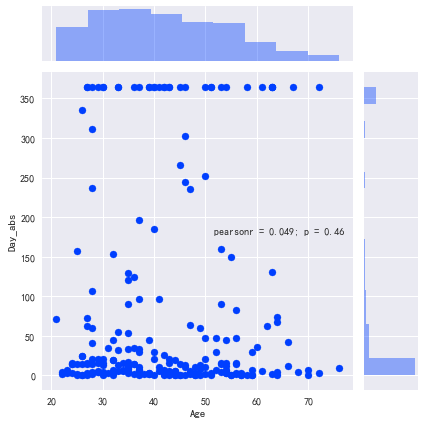

In [46]:
sns.jointplot('Age','Day_abs',df, kind='scatter')

D:\ruanjian\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\ruanjian\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


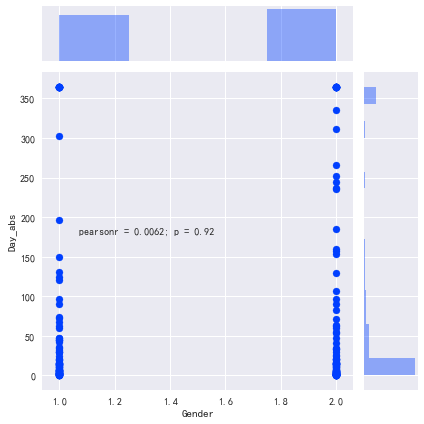

In [47]:
sns.jointplot('Gender','Day_abs',df, kind='scatter')

D:\ruanjian\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\ruanjian\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


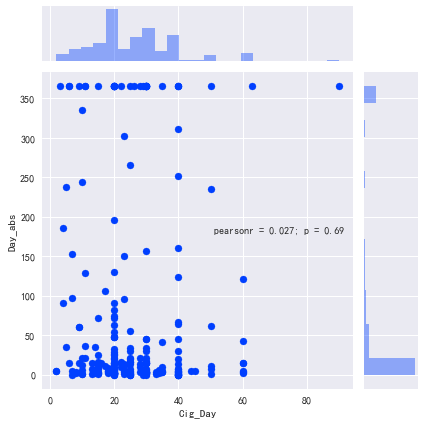

In [48]:
sns.jointplot('Cig_Day','Day_abs',df, kind='scatter')

D:\ruanjian\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\ruanjian\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


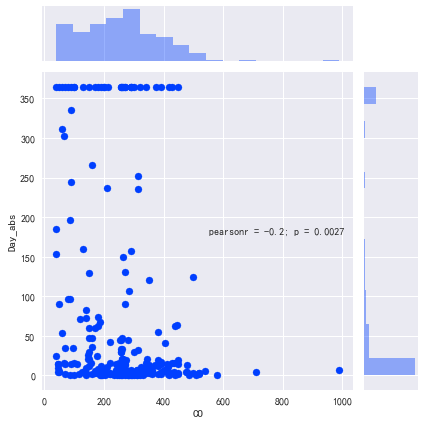

In [49]:
sns.jointplot('CO','Day_abs',df, kind='scatter')

D:\ruanjian\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\ruanjian\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


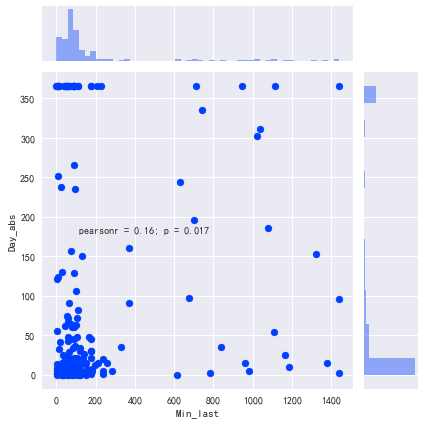

In [50]:
sns.jointplot('Min_last','Day_abs',df, kind='scatter')

D:\ruanjian\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
D:\ruanjian\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


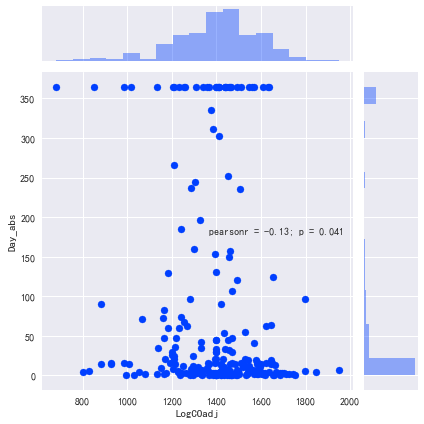

In [51]:
sns.jointplot('LogCOadj','Day_abs',df, kind='scatter')

### 多元线性回归

In [52]:
from sklearn.linear_model import LinearRegression

In [53]:
lger = LinearRegression()

In [54]:
X = df[['Age','Cig_Day','CO','Min_last','LogCOadj']].copy()

In [55]:
y = df['Day_abs']

In [56]:
lger.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [57]:
lger.coef_

array([ 0.38626493,  1.11557687, -0.10834188,  0.05535487, -0.04762621])

In [58]:
lger.intercept_

119.92690818694643

In [59]:
lger.n_jobs

1

In [60]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [62]:
lger.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [63]:
lger.score(X_test, y_test)

0.05330375639381579

### 多项式回归

In [64]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
poly_reg = Pipeline([
    ("poly", PolynomialFeatures(degree=2)),
    #("std_scaler", StandardScaler()),
    ("lin_reg", LinearRegression())
])

In [65]:
poly_reg.fit(X_train, y_train)

Pipeline(memory=None,
     steps=[('poly', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('lin_reg', LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False))])

In [66]:
poly_reg.score(X_test, y_test)

-0.4460151867085389

In [67]:
poly = PolynomialFeatures(degree=2) # 最多几次幂
poly.fit(X_train)
X2 = poly.transform(X_train)

In [68]:
poly.get_params()

{'degree': 2, 'include_bias': True, 'interaction_only': False}

In [69]:
poly.powers_

array([[0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0],
       [0, 0, 0, 0, 1],
       [2, 0, 0, 0, 0],
       [1, 1, 0, 0, 0],
       [1, 0, 1, 0, 0],
       [1, 0, 0, 1, 0],
       [1, 0, 0, 0, 1],
       [0, 2, 0, 0, 0],
       [0, 1, 1, 0, 0],
       [0, 1, 0, 1, 0],
       [0, 1, 0, 0, 1],
       [0, 0, 2, 0, 0],
       [0, 0, 1, 1, 0],
       [0, 0, 1, 0, 1],
       [0, 0, 0, 2, 0],
       [0, 0, 0, 1, 1],
       [0, 0, 0, 0, 2]], dtype=int64)

In [70]:
X2.shape

(175, 21)

In [71]:
X3 = poly.transform(X_test)

In [72]:
lin2 = LinearRegression()
lin2.fit(X2,y_train)
lin2.coef_

array([ 0.00000000e+00,  5.08130638e+00, -1.20002441e+01,  4.20811215e+00,
        6.24657836e-01, -9.50721647e-01, -4.23550405e-02,  2.06349962e-02,
        9.78819835e-03, -4.81798042e-03, -2.91641204e-03,  7.28579592e-03,
       -2.70988398e-02, -8.95041821e-03,  1.41602500e-02,  3.55768947e-03,
       -3.30395284e-03, -3.83019687e-03, -6.31009136e-04,  4.68754799e-04,
        5.28093348e-04])

In [73]:
lin2.intercept_

317.122420566999

In [74]:
lin2.score(X3,y_test)

-0.4460151867085389

### 三项式回归

In [75]:
poly = PolynomialFeatures(degree=3) # 最多几次幂
poly.fit(X_train)
X2 = poly.transform(X_train)
X3 = poly.transform(X_test)
lin3 = LinearRegression()
lin3.fit(X2,y_train)
lin3.score(X3,y_test)

-193.5841084690709

### 自变量

In [76]:
poly.get_feature_names()

['1',
 'x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x3^2',
 'x3 x4',
 'x4^2',
 'x0^3',
 'x0^2 x1',
 'x0^2 x2',
 'x0^2 x3',
 'x0^2 x4',
 'x0 x1^2',
 'x0 x1 x2',
 'x0 x1 x3',
 'x0 x1 x4',
 'x0 x2^2',
 'x0 x2 x3',
 'x0 x2 x4',
 'x0 x3^2',
 'x0 x3 x4',
 'x0 x4^2',
 'x1^3',
 'x1^2 x2',
 'x1^2 x3',
 'x1^2 x4',
 'x1 x2^2',
 'x1 x2 x3',
 'x1 x2 x4',
 'x1 x3^2',
 'x1 x3 x4',
 'x1 x4^2',
 'x2^3',
 'x2^2 x3',
 'x2^2 x4',
 'x2 x3^2',
 'x2 x3 x4',
 'x2 x4^2',
 'x3^3',
 'x3^2 x4',
 'x3 x4^2',
 'x4^3']

###  系数和截距

In [77]:
lin3.coef_

array([-9.62932399e+06,  2.84935878e+02, -2.39344164e+02,  2.38525471e+02,
        1.78819730e+01, -4.57876026e+01, -1.84950684e+00,  3.42316745e-01,
        1.42087033e+00,  2.92583430e-01, -5.18430731e-01, -1.22806841e+00,
       -1.54924266e+00, -1.70279410e-01,  6.34076850e-01,  3.89814559e-01,
        1.33585240e-01, -4.78886464e-01,  1.64878119e-02, -5.74275665e-02,
        6.61481050e-02,  7.50905206e-03,  3.69250847e-03, -2.06119694e-03,
       -7.68218405e-04,  9.06073870e-04, -9.08030852e-03,  2.80235783e-03,
        2.78733464e-04, -6.73248152e-04,  9.83299342e-04,  5.15215350e-05,
       -1.21788777e-03, -6.24171714e-06, -1.78973424e-04,  2.53015317e-04,
        4.26492018e-03, -2.13341134e-03, -8.41844135e-04,  1.35320178e-03,
       -1.45643502e-03, -6.18194426e-05,  1.62504386e-03, -2.88159971e-06,
        1.82727598e-04, -3.81583002e-04,  2.97062060e-04,  2.08766866e-04,
       -4.68793578e-04,  3.81745780e-05, -2.02507122e-04,  2.59606466e-04,
        5.41480841e-06, -

In [78]:
lin3.intercept_

9635695.28891059

### PCA与多项式回归

In [79]:
pca = PCA(n_components=5)
pca.fit(X)
X_reduction = pca.transform(X)
# 降噪音，去除一些信息
X_restore = pca.inverse_transform(X_reduction)
X_restore.shape

(234, 5)

In [80]:
X_restore

array([[  61.,   30.,  270.,   60., 1419.],
       [  54.,   30.,  220.,  160., 1393.],
       [  67.,   30.,  270.,   50., 1412.],
       ...,
       [  45.,   25.,  205.,  120., 1337.],
       [  54.,   20.,  290.,   60., 1450.],
       [  34.,   22.,  265.,  150., 1468.]])

In [81]:
X_train, X_test, y_train, y_test = train_test_split(X_restore, y)

In [82]:
poly = PolynomialFeatures(degree=3) # 最多几次幂
poly.fit(X_train)
X2 = poly.transform(X_train)
X3 = poly.transform(X_test)
lin3 = LinearRegression()
lin3.fit(X2,y_train)
lin3.score(X3,y_test)

-1.336466023998649

In [83]:
print(lin3.coef_)
print(lin3.intercept_)

[-2.09102944e+06 -6.60083398e+01  6.78607969e+01 -3.06333791e+02
  5.77592677e+00 -5.18370429e+01  6.80793583e-01 -4.95821916e-01
  7.92037248e-01 -5.89175143e-02  6.70949892e-02  6.69212485e-01
 -7.25355926e-01 -1.16546182e-01 -6.17231468e-02  1.65410113e-01
 -1.13729463e-01  2.64938689e-01 -8.18396800e-03 -1.80288025e-02
  6.81113906e-02 -3.12498290e-03 -1.41943070e-04  9.56610203e-04
  7.82459311e-04 -3.55187111e-04 -7.55912412e-03 -2.48107751e-03
 -1.20832460e-03  1.28367914e-03  1.56769131e-04  3.94422766e-04
 -3.80128206e-04  4.18143144e-05  2.27759058e-05 -7.25012538e-05
  2.88513428e-03  1.39258996e-04 -1.13731324e-04 -5.15364284e-04
 -7.58005464e-04 -5.40788056e-04  7.75177861e-04 -7.19249740e-05
  2.00460754e-04 -1.92671191e-05  5.69739699e-05  2.41083645e-05
 -1.15537588e-04  3.46478283e-05  9.19249774e-05 -4.77081387e-05
 -1.87904817e-07  8.83974484e-06  3.85639724e-06 -2.69908858e-05]
2111434.1162174204


## 从皮尔森系数开始分析
### 保留
#### CO         -0.195320
####  Min_last    0.155326
#### LogCOadj   -0.133506

In [84]:
# 保留
df.corr()['Day_abs']

Id         -0.022502
Age         0.048717
Gender      0.006203
Cig_Day     0.026584
CO         -0.195320
Min_last    0.155326
LogCOadj   -0.133506
Day_abs     1.000000
Name: Day_abs, dtype: float64

In [85]:
X = df[['CO','Min_last','LogCOadj']].copy()
y = df['Day_abs']

#### 保留3项后做回归分析

In [86]:
# 训练数据和测试数据分离
X_train, X_test, y_train, y_test = train_test_split(X, y)

### 一次回归

In [87]:
poly = PolynomialFeatures(degree=1) # 最多几次幂
poly.fit(X_train)
new_X_train = poly.transform(X_train)
new_X_test = poly.transform(X_test)
lin3 = LinearRegression()
lin3.fit(new_X_train,y_train)
lin3.score(new_X_test,y_test)

-0.3839666314906416

### 二次回归

In [88]:
poly = PolynomialFeatures(degree=2) # 最多几次幂
poly.fit(X_train)
new_X_train = poly.transform(X_train)
new_X_test = poly.transform(X_test)
lin3 = LinearRegression()
lin3.fit(new_X_train,y_train)
lin3.score(new_X_test,y_test)

-0.38213715933954284

### 三次回归

In [89]:
poly = PolynomialFeatures(degree=3) # 最多几次幂
poly.fit(X_train)
new_X_train = poly.transform(X_train)
new_X_test = poly.transform(X_test)
lin3 = LinearRegression()
lin3.fit(new_X_train,y_train)
lin3.score(new_X_test,y_test)

-0.6207474755091231

#### 四次回归

In [90]:
poly = PolynomialFeatures(degree=4) # 最多几次幂
poly.fit(X_train)
new_X_train = poly.transform(X_train)
new_X_test = poly.transform(X_test)
lin3 = LinearRegression()
lin3.fit(new_X_train,y_train)
lin3.score(new_X_test,y_test)

-23.3312629350443

In [91]:
X = df[['Age','Cig_Day','CO','Min_last','LogCOadj']].copy()
y = df['Day_abs']

In [92]:
X['x3'] = df['Cig_Day']**2

In [93]:
# 训练数据和测试数据分离
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [94]:
lin = LinearRegression()
lin.fit(X_train, y_train)
lin.score(X_test, y_test)

-0.004852479301875601

In [95]:
lin.intercept_

139.05534631075747

In [96]:
df.corr( 'spearman')['Day_abs']

Id          0.047950
Age        -0.040973
Gender     -0.043962
Cig_Day    -0.059392
CO         -0.248767
Min_last    0.070922
LogCOadj   -0.196038
Day_abs     1.000000
Name: Day_abs, dtype: float64

In [97]:
X = df[['Age','Gender','Cig_Day','CO','Min_last','LogCOadj']].copy()
y = df['Day_abs']

In [98]:
y

0        6
1        3
2      365
3       16
4       45
5       47
6       36
7        2
8      365
9      365
10     365
11       4
12       2
13      26
14     129
15       0
16      21
17       1
18     365
19     235
20       5
21      47
22       1
23       3
24       1
25      32
26       5
27     365
28     365
29      15
      ... 
204    335
205    365
206     16
207    153
208     54
209     15
210    244
211      0
212     96
213     25
214     12
215      2
216     21
217     20
218      2
219     15
220      1
221     67
222      7
223      4
224      3
225     11
226     13
227    150
228     13
229      6
230    196
231      0
232      7
233     15
Name: Day_abs, Length: 234, dtype: int64

In [99]:
# 训练数据和测试数据分离
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=666)

In [100]:
poly = PolynomialFeatures(degree=2) # 最多几次幂
poly.fit(X)
new_X = poly.transform(X)
lin3 = LinearRegression()
lin3.fit(new_X,y)
lin3.score(new_X,y)

-2.229680245035972

In [101]:
poly = PolynomialFeatures(degree=3) # 最多几次幂
poly.fit(X)
new_X = poly.transform(X)
lin3 = LinearRegression()
lin3.fit(new_X,y)
lin3.score(new_X,y)

0.4058069094929888

In [102]:
poly = PolynomialFeatures(degree=4) # 最多几次幂
poly.fit(X)
new_X = poly.transform(X)
lin3 = LinearRegression()
lin3.fit(new_X,y)
lin3.score(new_X,y)

-9.66641493996826

In [103]:
poly = PolynomialFeatures(degree=5) # 最多几次幂
poly.fit(X)
new_X = poly.transform(X)
lin3 = LinearRegression()
lin3.fit(new_X,y)
lin3.score(new_X,y)

0.9999973551483756

In [104]:
poly = PolynomialFeatures(degree=6) # 最多几次幂
poly.fit(X)
new_X = poly.transform(X)
lin3 = LinearRegression()
lin3.fit(new_X,y)
lin3.score(new_X,y)

1.0

In [105]:
lin3.coef_

array([ 1.90331945e-13, -6.44085349e-13, -1.00545043e-12, -8.35385229e-14,
       -2.18299783e-13, -1.24143263e-12, -2.07177307e-13, -2.80417990e-14,
       -1.33425925e-12, -1.01429018e-13,  4.95603407e-13,  6.70733719e-14,
       -4.23444303e-14, -8.73905987e-14, -1.40556578e-14, -6.24130747e-15,
       -3.38578296e-13, -3.20107821e-13, -6.63250277e-14,  1.17652431e-13,
       -4.83807180e-13, -4.99707980e-13, -6.60475860e-13, -1.07689692e-13,
        1.21193048e-13,  4.10266273e-13, -9.62805197e-14, -8.68705297e-14,
       -1.07014203e-12, -8.95291335e-14,  3.54798895e-13,  4.00240739e-13,
       -1.23477168e-12, -4.30910166e-12, -6.64255907e-16,  2.80883454e-15,
        6.24020310e-15, -3.28563393e-14, -1.18782169e-13,  2.16898717e-13,
        7.73492475e-14,  1.90180794e-13,  2.57172744e-12, -4.32489970e-13,
       -5.04198996e-13, -2.67572613e-12, -3.95743776e-12, -1.35438857e-11,
       -2.78498624e-11, -1.13140009e-16, -5.56106867e-16, -2.82839985e-16,
        6.06412785e-16, -

In [106]:
poly.get_feature_names()

['1',
 'x0',
 'x1',
 'x2',
 'x3',
 'x4',
 'x5',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x0 x3',
 'x0 x4',
 'x0 x5',
 'x1^2',
 'x1 x2',
 'x1 x3',
 'x1 x4',
 'x1 x5',
 'x2^2',
 'x2 x3',
 'x2 x4',
 'x2 x5',
 'x3^2',
 'x3 x4',
 'x3 x5',
 'x4^2',
 'x4 x5',
 'x5^2',
 'x0^3',
 'x0^2 x1',
 'x0^2 x2',
 'x0^2 x3',
 'x0^2 x4',
 'x0^2 x5',
 'x0 x1^2',
 'x0 x1 x2',
 'x0 x1 x3',
 'x0 x1 x4',
 'x0 x1 x5',
 'x0 x2^2',
 'x0 x2 x3',
 'x0 x2 x4',
 'x0 x2 x5',
 'x0 x3^2',
 'x0 x3 x4',
 'x0 x3 x5',
 'x0 x4^2',
 'x0 x4 x5',
 'x0 x5^2',
 'x1^3',
 'x1^2 x2',
 'x1^2 x3',
 'x1^2 x4',
 'x1^2 x5',
 'x1 x2^2',
 'x1 x2 x3',
 'x1 x2 x4',
 'x1 x2 x5',
 'x1 x3^2',
 'x1 x3 x4',
 'x1 x3 x5',
 'x1 x4^2',
 'x1 x4 x5',
 'x1 x5^2',
 'x2^3',
 'x2^2 x3',
 'x2^2 x4',
 'x2^2 x5',
 'x2 x3^2',
 'x2 x3 x4',
 'x2 x3 x5',
 'x2 x4^2',
 'x2 x4 x5',
 'x2 x5^2',
 'x3^3',
 'x3^2 x4',
 'x3^2 x5',
 'x3 x4^2',
 'x3 x4 x5',
 'x3 x5^2',
 'x4^3',
 'x4^2 x5',
 'x4 x5^2',
 'x5^3',
 'x0^4',
 'x0^3 x1',
 'x0^3 x2',
 'x0^3 x3',
 'x0^3 x4',
 'x0^3 x5',
 'x0^

In [107]:
poly.powers_.shape

(924, 6)

In [108]:
args = lin3.coef_.argsort()

In [109]:
args[:5]

array([650, 678, 425, 801, 822], dtype=int64)

In [110]:
name = poly.get_feature_names()

In [111]:
for i in range(100):
    print(name[args[i]])

x0 x1 x3 x4^2 x5
x0 x2 x3^4
x2^2 x5^3
x1 x2^2 x4^2 x5
x1 x3^3 x4^2
x2^3 x3^2 x4
x1 x2 x3 x4^2 x5
x0 x1 x4^3 x5
x0^2 x3^3 x4
x2^4 x4 x5
x2^2 x3 x5^2
x0^4 x4^2
x1 x3^3 x4 x5
x0^2 x2^2 x3 x5
x0 x2 x3^3 x4
x0^4 x3 x5
x1^2 x2 x5^3
x0^2 x1 x3^2 x5
x0^3 x3^2 x4
x0 x2^2 x4^2 x5
x0^4 x3^2
x2^2 x3^3 x5
x0^5 x5
x0^2 x2 x3 x4 x5
x0 x1 x3^2 x4^2
x3 x4^2 x5^2
x2^4 x3 x5
x0^4 x2 x5
x0^2 x2 x4^2 x5
x0^2 x2 x3 x4^2
x2^4 x3 x4
x2^3 x4^2 x5
x0 x4^2 x5^2
x0 x1 x3 x4^3
x3^2 x4 x5^2
x0 x2^2 x3 x4^2
x0 x1 x2 x4^2 x5
x0^3 x1 x4 x5
x0^2 x1 x3^3
x1 x2 x3^2 x4^2
x2 x4 x5^3
x0 x2 x3^2 x5^2
x2^5 x5
x1 x2^3 x3 x5
x1 x2 x3^2 x5^2
x0^4 x4 x5
x0 x1 x3^2 x4 x5
x3 x4^3 x5
x0 x3^4 x4
x1 x3 x4^3 x5
x0 x2^3 x4^2
x0^3 x2 x3 x5
x0 x2 x3 x4^3
x2 x3^3 x4^2
x0^5 x4
x2 x3^2 x5^2
x0^2 x3 x4^2 x5
x0 x3^2 x5^2
x0 x2^3 x5^2
x0^2 x1 x4 x5^2
x2 x3^3 x5
x1 x2 x5^3
x2^2 x3^2 x5
x1 x2 x3 x4 x5^2
x0 x1 x3^4
x0^2 x2 x3^2 x5
x2 x4^2 x5^2
x0^2 x2^2 x3^2
x3^3 x4 x5
x0^3 x3^2 x5
x0 x1 x2^2 x4 x5
x0^4 x1 x5
x0^2 x1 x2 x4 x5
x0^3 x5^2
x0 x1 x3^3

In [112]:
X_name = DataFrame()

In [113]:
X_name['x0'] = df['Age'] * df['Gender'] * df['CO'] * df['Min_last'] * df['Min_last'] * df['LogCOadj']

In [114]:
lin3 = LinearRegression()
lin3.fit(X_name,y)
lin3.score(X_name,y)

0.011076712249062703

## 箱型图和各个属性数据描述

In [142]:
X = df[['Age','Cig_Day','CO','Min_last','LogCOadj']].copy()
X.describe()

,Age,Cig_Day,CO,Min_last,LogCOadj
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,42.247863,25.547009,258.465812,176.653846,1397.457265
std,12.313087,13.129592,135.475672,295.291730,198.817384
min,21.000000,2.000000,40.000000,0.000000,682.000000
25%,32.000000,18.000000,160.000000,55.000000,1288.000000
50%,41.000000,23.000000,260.000000,80.000000,1419.000000
75%,51.000000,30.000000,337.500000,120.000000,1527.250000
max,76.000000,90.000000,990.000000,1440.000000,1951.000000


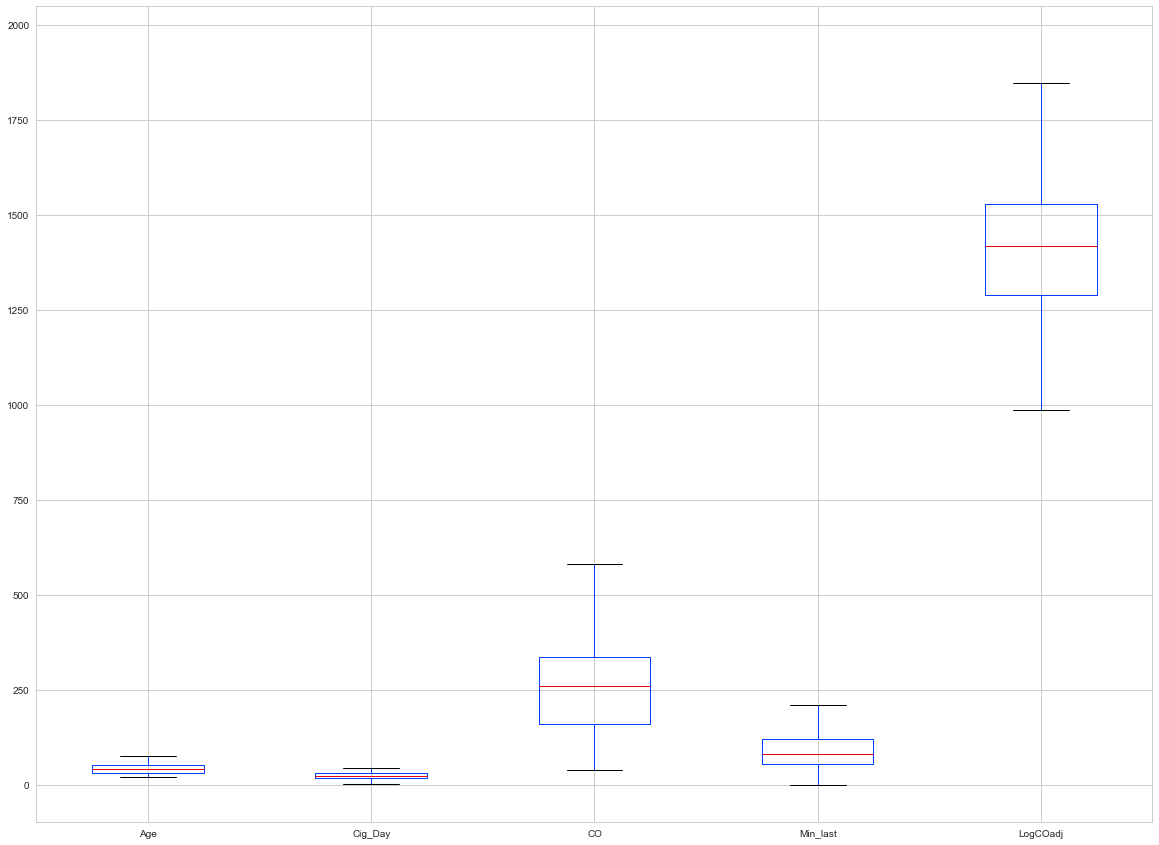

In [212]:
plt.figure(figsize=(20,15))
p = X.boxplot(return_type='dict')
x = p['fliers'][0].get_xdata()
y = p['fliers'][0].get_ydata()
y.sort()

# 注释
for i in range(len(x)):
    if i > 0:
        plt.annotate(y[i], xy=(x[i],y[i]), xytext=(x[i]+0.05 - 0.8/(y[i]-y[i-1]), y[i]))
    else:
        plt.annotate(x[i], y[i], xytext=(x[i]+0.08, y[i]))
plt.show()

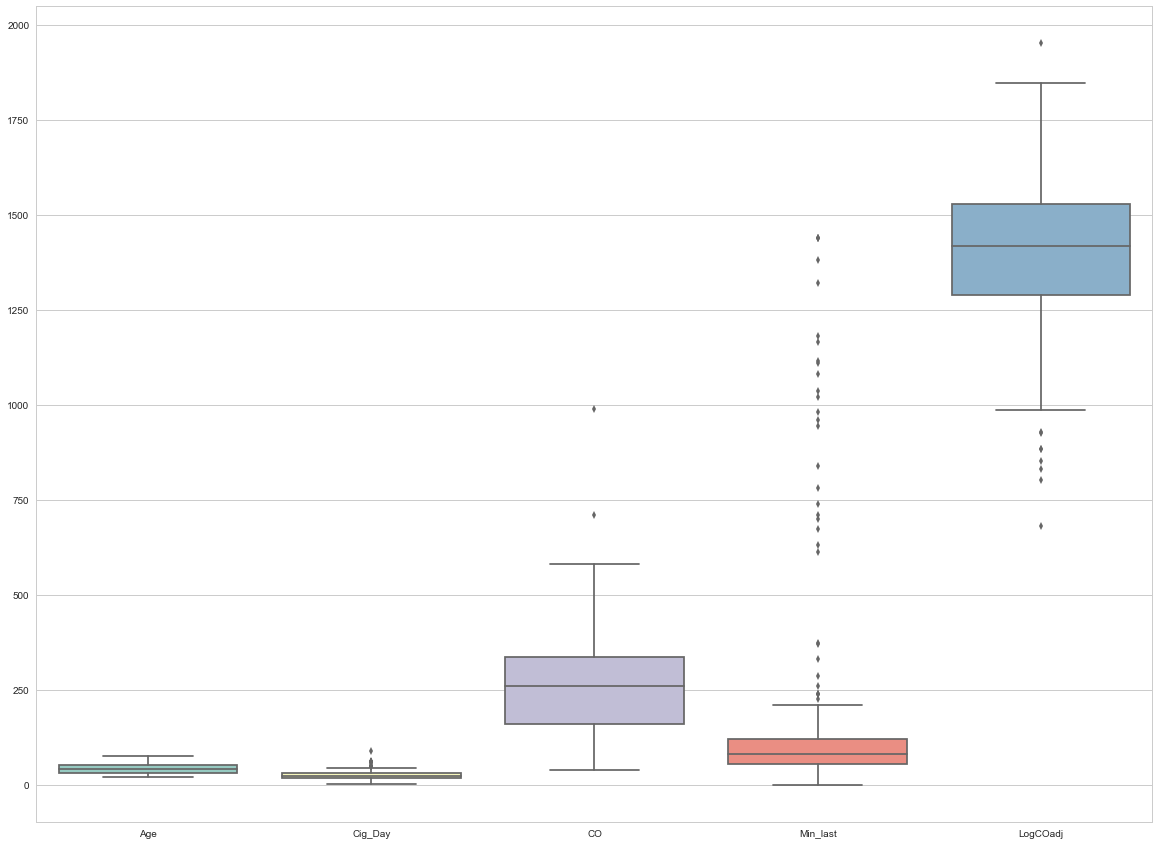

In [213]:
sns.set_style("whitegrid")
plt.figure(figsize=(20,15))
ax = sns.boxplot(data=X, palette='Set3')

In [214]:
X

,Age,Cig_Day,CO,Min_last,LogCOadj
0,61,30,270,60,1419
1,54,30,220,160,1393
2,67,30,270,50,1412
3,56,25,250,70,1392
4,54,30,255,70,1400
5,52,20,160,105,1220
6,60,11,160,95,1214
7,51,20,520,120,1742
8,63,30,215,90,1339
9,36,25,180,87,1260


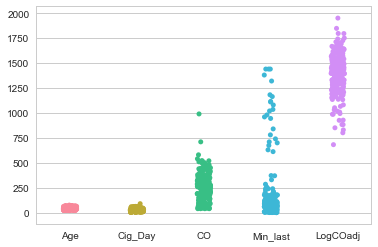

In [215]:
ax = sns.stripplot(data=X, jitter=True)

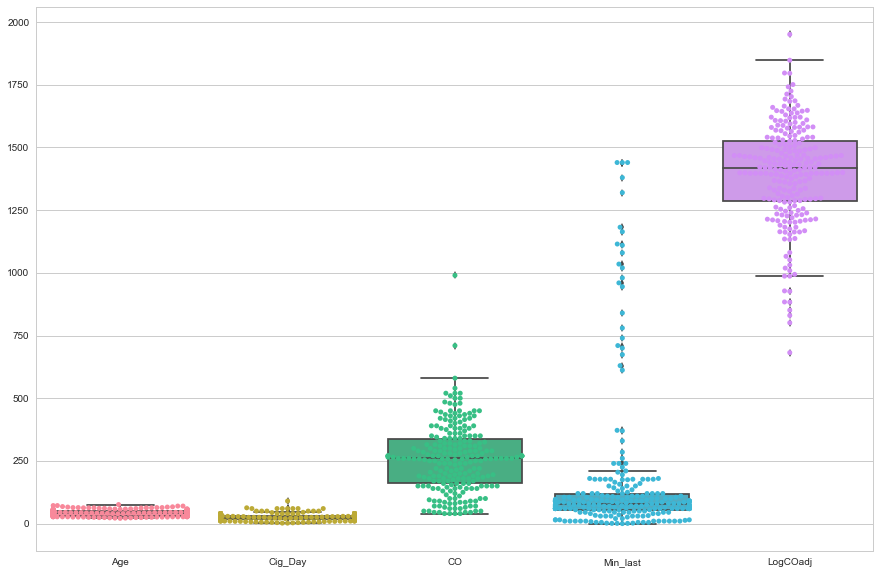

In [216]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(data=X)
x = sns.swarmplot(data=X)
plt.savefig('未去.png',dpi=400)

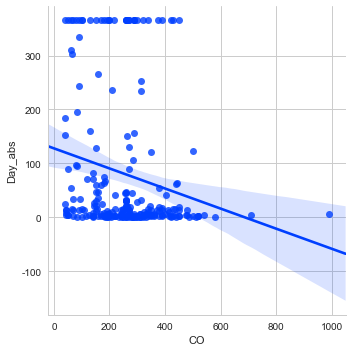

In [217]:
g = sns.lmplot(x='CO', y='Day_abs',data=df)

In [218]:
des = X.describe()

In [219]:
des.shape

(8, 5)

In [220]:
des

,Age,Cig_Day,CO,Min_last,LogCOadj
count,234.000000,234.000000,234.000000,234.000000,234.000000
mean,42.247863,25.547009,258.465812,176.653846,1397.457265
std,12.313087,13.129592,135.475672,295.291730,198.817384
min,21.000000,2.000000,40.000000,0.000000,682.000000
25%,32.000000,18.000000,160.000000,55.000000,1288.000000
50%,41.000000,23.000000,260.000000,80.000000,1419.000000
75%,51.000000,30.000000,337.500000,120.000000,1527.250000
max,76.000000,90.000000,990.000000,1440.000000,1951.000000


In [224]:
new_df = df[['Age','Cig_Day','CO','Min_last','LogCOadj']].copy()
print("上界"+"\t\t下界")
Shang = []
Xia = []
for i in range(5):
    Q1 = des.iloc[4,i]
    Q2 = des.iloc[5,i]
    Q3 = des.iloc[6,i]
    cha = Q3 - Q1
    shang = Q2 + 1.5*cha
    xia = Q2 - 1.5*cha
    Shang.append(shang)
    Xia.append(xia)
    print(str(shang), end="\t\t")
    print(xia)

上界		下界
69.5		12.5
41.0		5.0
526.25		-6.25
177.5		-17.5
1777.875		1060.125


In [225]:
new_df

,Age,Cig_Day,CO,Min_last,LogCOadj
0,61,30,270,60,1419
1,54,30,220,160,1393
2,67,30,270,50,1412
3,56,25,250,70,1392
4,54,30,255,70,1400
5,52,20,160,105,1220
6,60,11,160,95,1214
7,51,20,520,120,1742
8,63,30,215,90,1339
9,36,25,180,87,1260


In [226]:
new_df.shape

(234, 5)

In [227]:
new_df

,Age,Cig_Day,CO,Min_last,LogCOadj
0,61,30,270,60,1419
1,54,30,220,160,1393
2,67,30,270,50,1412
3,56,25,250,70,1392
4,54,30,255,70,1400
5,52,20,160,105,1220
6,60,11,160,95,1214
7,51,20,520,120,1742
8,63,30,215,90,1339
9,36,25,180,87,1260


In [228]:
len(Shang)

5

In [179]:
dellist = []
for i in range(234):
    for j in range(5):
        now = new_df.iloc[i,j]
        if now>Shang[j] or now<Xia[j]:
            dellist.append(i)
            print(i)
            break

10
19
20
23
24
26
28
29
30
39
40
41
43
46
47
50
59
61
62
66
71
76
79
83
85
87
100
101
103
106
108
109
118
120
126
135
137
142
147
149
156
165
167
168
170
172
176
180
182
183
187
190
191
196
201
204
206
207
208
210
212
214
215
218
220
230


In [229]:
new_df = new_df.drop(dellist)

In [230]:
new_df.shape

(168, 5)

In [183]:
new_df.describe()

,Age,Cig_Day,CO,Min_last,LogCOadj
count,168.000000,168.000000,168.000000,168.000000,168.000000
mean,41.553571,24.583333,285.333333,76.755952,1423.732143
std,11.728342,8.742091,96.655426,43.154020,146.787617
min,21.000000,5.000000,115.000000,0.000000,1066.000000
25%,31.750000,20.000000,210.000000,53.750000,1314.000000
50%,40.000000,24.000000,270.000000,75.000000,1433.000000
75%,51.000000,30.000000,346.250000,100.000000,1528.500000
max,68.000000,40.000000,520.000000,177.000000,1742.000000


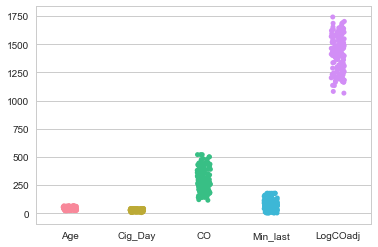

In [184]:
ax = sns.stripplot(data=new_df, jitter=True)

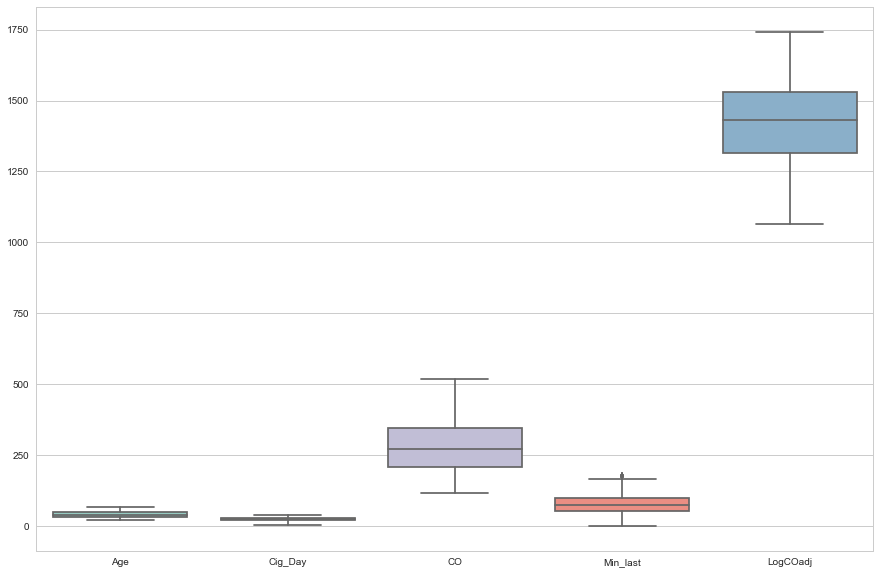

In [185]:
sns.set_style("whitegrid")
plt.figure(figsize=(15,10))
ax = sns.boxplot(data=new_df, palette='Set3',dodge=False)

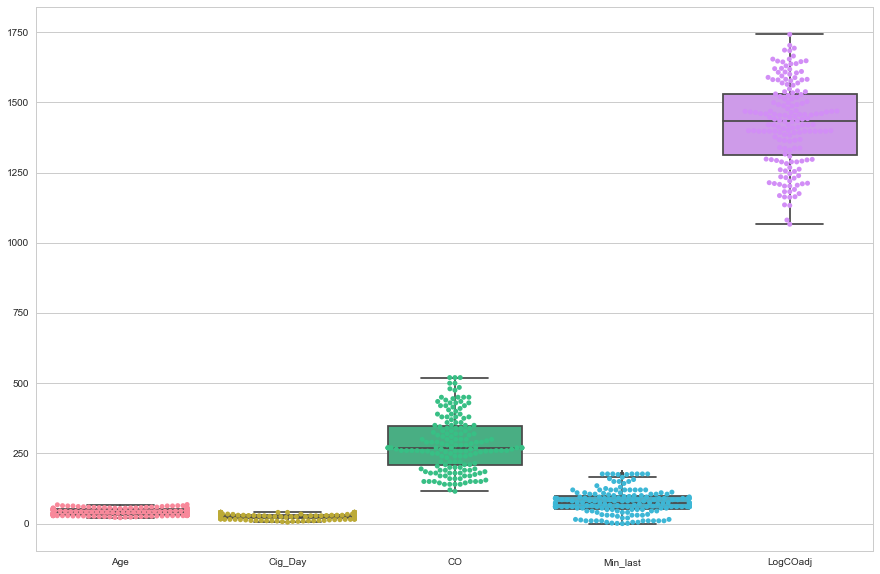

In [231]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(data=new_df)
x = sns.swarmplot(data=new_df)
plt.savefig('已去.png',dpi=400)

In [192]:
df.shape

(234, 8)

In [235]:
y = []
for i in new_df.index:
    y.append(df.iloc[i][7])

In [236]:
y = DataFrame(y)

In [237]:
y.shape

(168, 1)

In [201]:
new_df.shape

(168, 5)

In [202]:
lin3.fit(new_df,y)
lin3.score(new_df,y)

0.03778623929527192

In [203]:
lin3.coef_

array([[ 1.04662881,  0.45415806, -0.04948843, -0.39746642, -0.06379224]])

In [204]:
lin3.normalize

False

In [205]:
poly = PolynomialFeatures(degree=2) # 最多几次幂
poly.fit(new_df)
X2 = poly.transform(new_df)
lin3 = LinearRegression()
lin3.fit(new_df,y)
lin3.score(new_df,y)

0.03778623929527192

# 去掉离群点的回归分析

In [238]:
y.shape

(168, 1)

In [244]:
y.index = new_df.index
y

,0
0,6
1,3
2,365
3,16
4,45
5,47
6,36
7,2
8,365
9,365


In [239]:
import statsmodels.api as sm

In [245]:
X=sm.add_constant(new_df)
est=sm.OLS(y,X).fit()

In [246]:
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      0   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.272
Date:                Sun, 19 Aug 2018   Prob (F-statistic):              0.278
Time:                        16:42:32   Log-Likelihood:                -1042.4
No. Observations:                 168   AIC:                             2097.
Df Residuals:                     162   BIC:                             2115.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        150.2244    290.682      0.517      0.606    -423.791     724.240
Age            1.0466      0.827      1.266      0.207      -0.586       2.679
Cig_Day        0.4542      1.191      0.381      0.704      -1.898       2.806
CO            -0.0495      0.472     -0.105      0.917      -0.982       0.883
Min_last      -0.3975      0.267     -1.489      0.138      -0.925       0.130
LogCOadj      -0.0638      0.304     -0.210      0.834      -0.663       0.536
==============================================================================
Omnibus:                       57.470   Durbin-Watson:                   2.049
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              105.360
Skew:                           1.758   Prob(JB):                     1.32e-23
Kurtosis:                       4.638   Cond. No.                     4.52e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.52e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [247]:
new_df['Day_abs'] = y

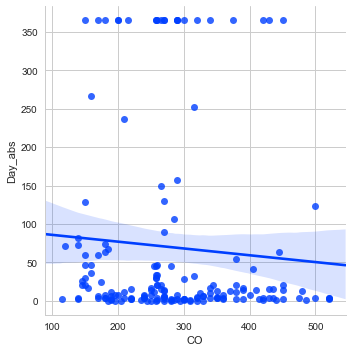

In [250]:
g = sns.lmplot(x='CO', y='Day_abs',data=new_df)

In [ ]:
g = sns.lmplot(x='CO', y='Day_abs',data=new_df)

### 影响因素绘图

In [134]:
plt.rcParams['font.sans-serif'] = ['SimHei'] # 显示中文标题 
plt.rcParams['axes.unicode_minus'] = False # 正常显示正负号 
new_df = DataFrame()
new_df['CO'] = df['CO']
new_df['Cig_Day的平方'] = df['Cig_Day']*df['Cig_Day']
new_df['Min_last的三次方'] = df['Min_last']*df['Min_last']*df['Min_last']
new_df['LogCOadj'] = df['LogCOadj']
new_df['Day_abs'] = df['Day_abs']

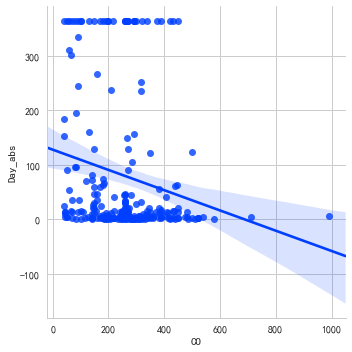

In [135]:
g = sns.lmplot(x='CO', y='Day_abs',data=new_df)

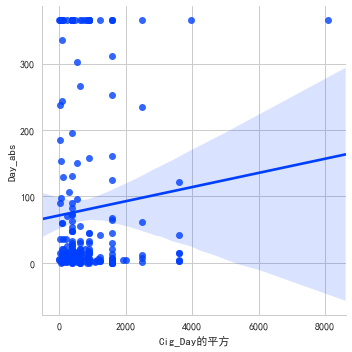

<Figure size 1440x1440 with 0 Axes>

In [136]:
g = sns.lmplot(x='Cig_Day的平方', y='Day_abs',data=new_df)
plt.figure(figsize=(20,20))
plt.show()

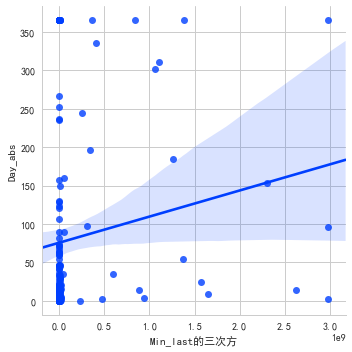

In [137]:
sns.lmplot(x='Min_last的三次方', y='Day_abs',data=new_df)

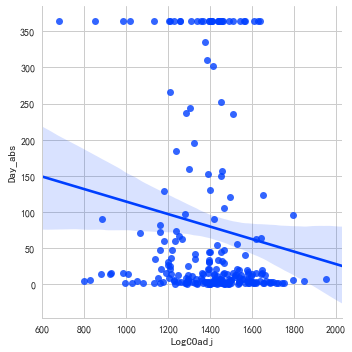

In [138]:
g = sns.lmplot(x='LogCOadj', y='Day_abs',data=new_df)

In [139]:
new_df

,CO,Cig_Day的平方,Min_last的三次方,LogCOadj,Day_abs
0,270,900,216000,1419,6
1,220,900,4096000,1393,3
2,270,900,125000,1412,365
3,250,625,343000,1392,16
4,255,900,343000,1400,45
5,160,400,1157625,1220,47
6,160,121,857375,1214,36
7,520,400,1728000,1742,2
8,215,900,729000,1339,365
9,180,625,658503,1260,365


Text(0.5,1,'Estimated number of clusters: 3')

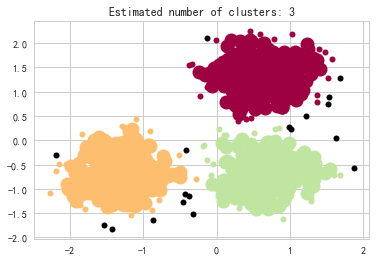

In [140]:

import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets.samples_generator import make_blobs
from sklearn.preprocessing import StandardScaler
 
#生产数据
centers = [[1,1],[-1,-1],[1,-1]]
X,labels_true = make_blobs(n_samples=750,
                           centers=centers,
                           cluster_std=0.4,
                           random_state=0)
#对数据进行标准化
X = StandardScaler().fit_transform(X)
 
#计算
db = DBSCAN(eps=0.3,min_samples=10).fit(X)
core_samples_mask = np.zeros_like(db.labels_,dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_
 
n_clusters_ = len(set(labels))-(1 if -1 in labels else 0)
 
unique_labels = set(labels)
colors = plt.cm.Spectral(np.linspace(0,1,len(unique_labels)))
for k,col in zip(unique_labels,colors):
    if k == -1:
        col = 'k'
    class_member_mask = (labels == k)
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
 
    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=6)
 
plt.title('Estimated number of clusters: %d' % n_clusters_)


D:\ruanjian\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.


AttributeError: module 'matplotlib.cm' has no attribute 'spectral'

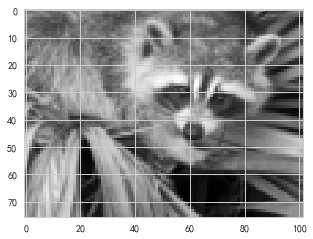

In [141]:
import time
import scipy as sp
import numpy as np
import matplotlib.pyplot as plt
 
from sklearn.feature_extraction import image
from sklearn.cluster import spectral_clustering
from sklearn.utils.testing import SkipTest
from sklearn.utils.fixes import sp_version
 
if sp_version < (0,12):
    raise SkipTest("Skipping because SciPy version earlier than 0.12.0 and "
                   "thus does not include the scipy.misc.face() image.")
face = sp.misc.face(gray=True)
 
#减小集合
face = sp.misc.imresize(face,0.10)/255
 
graph = image.img_to_graph(face)
 
#参数beta越小，分割越独立
beta = 5
eps = 1e-6
graph.data = np.exp(-beta*graph.data/graph.data.std())+eps
 
N_REGIONS = 25
for assign_labels in ('kmeans','discretize'):
    t0 = time.time()
    labels = spectral_clustering(graph,n_clusters=N_REGIONS,
                                 assign_labels=assign_labels,random_state=1)
    t1 = time.time()
    labels = labels.reshape(face.shape)
    
    plt.figure(figsize=(5,5))
    plt.imshow(face,cmap=plt.cm.gray)
    for l in range(N_REGIONS):
        plt.contour(labels==l,contours=1,
                    colors = [plt.cm.spectral(l/float(N_REGIONS))])
    plt.xticks(())
    plt.yticks(())
    title = 'Spectral clustering: %s, %.2fs' % (assign_labels,(t1-t0))
    print(title)
    plt.title(title)
plt.show()


In [ ]:
from sklearn.cluster import AgglomerativeClustering
model = AgglomerativeClustering(n_clusters=df, affinity="precomputed", linkage='average')

In [ ]:
from hcluster import hcluster

In [ ]:
print(__doc__)

import time as time

import numpy as np
import scipy as sp

import matplotlib.pyplot as plt

from sklearn.feature_extraction.image import grid_to_graph
from sklearn.cluster import AgglomerativeClustering


# #############################################################################
# Generate data
try:  # SciPy >= 0.16 have face in misc
    from scipy.misc import face
    face = face(gray=True)
except ImportError:
    face = sp.face(gray=True)

# Resize it to 10% of the original size to speed up the processing
face = sp.misc.imresize(face, 0.10) / 255.

X = np.reshape(face, (-1, 1))

# #############################################################################
# Define the structure A of the data. Pixels connected to their neighbors.
connectivity = grid_to_graph(*face.shape)

# #############################################################################
# Compute clustering
print("Compute structured hierarchical clustering...")
st = time.time()
n_clusters = 15  # number of regions
ward = AgglomerativeClustering(n_clusters=n_clusters, linkage='ward',
                               connectivity=connectivity)
ward.fit(X)
label = np.reshape(ward.labels_, face.shape)
print("Elapsed time: ", time.time() - st)
print("Number of pixels: ", label.size)
print("Number of clusters: ", np.unique(label).size)

# #############################################################################
# Plot the results on an image
plt.figure(figsize=(5, 5))
plt.imshow(face, cmap=plt.cm.gray)
for l in range(n_clusters):
    plt.contour(label == l, contours=1,
                colors=[plt.cm.nipy_spectral(l / float(n_clusters)), ])
plt.xticks(())
plt.yticks(())
plt.show()

In [ ]:
ward = AgglomerativeClustering()

In [ ]:
ward.fit(df)

In [ ]:
ward.children_

In [ ]:
# Author: Gael Varoquaux
# License: BSD 3-Clause or CC-0

import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import pairwise_distances

np.random.seed(0)

# Generate waveform data
n_features = 2000
t = np.pi * np.linspace(0, 1, n_features)


def sqr(x):
    return np.sign(np.cos(x))

X = list()
y = list()
for i, (phi, a) in enumerate([(.5, .15), (.5, .6), (.3, .2)]):
    for _ in range(30):
        phase_noise = .01 * np.random.normal()
        amplitude_noise = .04 * np.random.normal()
        additional_noise = 1 - 2 * np.random.rand(n_features)
        # Make the noise sparse
        additional_noise[np.abs(additional_noise) < .997] = 0

        X.append(12 * ((a + amplitude_noise)
                 * (sqr(6 * (t + phi + phase_noise)))
                 + additional_noise))
        y.append(i)

X = np.array(X)
y = np.array(y)

n_clusters = 3

labels = ('Waveform 1', 'Waveform 2', 'Waveform 3')

# Plot the ground-truth labelling
plt.figure()
plt.axes([0, 0, 1, 1])
for l, c, n in zip(range(n_clusters), 'rgb',
                   labels):
    lines = plt.plot(X[y == l].T, c=c, alpha=.5)
    lines[0].set_label(n)

plt.legend(loc='best')

plt.axis('tight')
plt.axis('off')
plt.suptitle("Ground truth", size=20)


# Plot the distances
for index, metric in enumerate(["cosine", "euclidean", "cityblock"]):
    avg_dist = np.zeros((n_clusters, n_clusters))
    plt.figure(figsize=(5, 4.5))
    for i in range(n_clusters):
        for j in range(n_clusters):
            avg_dist[i, j] = pairwise_distances(X[y == i], X[y == j],
                                                metric=metric).mean()
    avg_dist /= avg_dist.max()
    for i in range(n_clusters):
        for j in range(n_clusters):
            plt.text(i, j, '%5.3f' % avg_dist[i, j],
                     verticalalignment='center',
                     horizontalalignment='center')

    plt.imshow(avg_dist, interpolation='nearest', cmap=plt.cm.gnuplot2,
               vmin=0)
    plt.xticks(range(n_clusters), labels, rotation=45)
    plt.yticks(range(n_clusters), labels)
    plt.colorbar()
    plt.suptitle("Interclass %s distances" % metric, size=18)
    plt.tight_layout()


# Plot clustering results
for index, metric in enumerate(["cosine", "euclidean", "cityblock"]):
    model = AgglomerativeClustering(n_clusters=n_clusters,
                                    linkage="average", affinity=metric)
    model.fit(X)
    plt.figure()
    plt.axes([0, 0, 1, 1])
    for l, c in zip(np.arange(model.n_clusters), 'rgbk'):
        plt.plot(X[model.labels_ == l].T, c=c, alpha=.5)
    plt.axis('tight')
    plt.axis('off')
    plt.suptitle("AgglomerativeClustering(affinity=%s)" % metric, size=20)


plt.show()

In [ ]:
def dif_0(dta):
    # 原始数据
    print('原始序列的检验结果为：',adfuller(dta))
    dta.plot()
    
def dif_1(dta):
    # 一阶差分
    fig = plt.figure(figsize=(12,8)) 
    ax1= fig.add_subplot(111) 
    diff1 = dta.diff(1) 
    diff1.plot(ax=ax1)
    print('一阶差分后的检验结果:')
    print(adfuller(diff1.dropna()))    
    
def dif_2(dta):
    # 二阶差分
    fig = plt.figure(figsize=(12,8)) 
    ax1= fig.add_subplot(111) 
    diff1 = dta.diff(1) 
    diff1.plot(ax=ax1)
    print('一阶差分后的检验结果:')
    print(adfuller(diff1.dropna()))    
    
    
def pcf_pacf_0(dta):
    #不做差分的 PCF 和 PCAF图
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(dta, lags=40, ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)
    
def pcf_pacf_2(dta):
    #二阶差分的 PCF 和 PCAF图
    dta2 = dta.diff(2) 
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(dta2, lags=40, ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(dta2, lags=40, ax=ax2)
    
    
def pcf_pacf_2(dta):
    #二阶差分的 PCF 和 PCAF图
    dta2 = dta.diff(2) 
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(dta2, lags=40, ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(dta2, lags=40, ax=ax2)
    
    

In [251]:
def dif_1(dta):
    # 一阶差分
    fig = plt.figure(figsize=(12,8)) 
    ax1= fig.add_subplot(111) 
    diff1 = dta.diff(1) 
    diff1.plot(ax=ax1)
    print('一阶差分后的检验结果:')
    print(adfuller(diff1.dropna()))

SyntaxError: unexpected EOF while parsing (<ipython-input-251-e965d04c1dd1>, line 1)

In [ ]:
def dif_2(dta):
    # 二阶差分
    fig = plt.figure(figsize=(12,8)) 
    ax1= fig.add_subplot(111) 
    diff1 = dta.diff(1) 
    diff1.plot(ax=ax1)
    print('一阶差分后的检验结果:')
    print(adfuller(diff1.dropna()))

In [ ]:
def pcf_pacf_1(dta):
    #一阶差分的 PCF 和 PCAF图
    dta1 = dta.diff(1) 
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(dta1, lags=40, ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(dta1, lags=40, ax=ax2)

In [ ]:
def pcf_pacf_2(dta):
    #二阶差分的 PCF 和 PCAF图
    dta2 = dta.diff(2) 
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(dta2, lags=40, ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(dta2, lags=40, ax=ax2)

In [ ]:
def pcf_pacf_0(dta):
    #不做差分的 PCF 和 PCAF图
    fig = plt.figure(figsize=(12,8))
    ax1 = fig.add_subplot(211)
    fig = sm.graphics.tsa.plot_acf(dta, lags=40, ax=ax1)
    ax2 = fig.add_subplot(212)
    fig = sm.graphics.tsa.plot_pacf(dta, lags=40, ax=ax2)